<a href="https://colab.research.google.com/github/isaacmikhail/TelecomX_challenge_part2_Alura/blob/main/TelecomX_challenge_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataframe=pd.read_csv('telecomX.csv')

In [6]:
print(dataframe.columns)

Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'Charges.Total', 'conta_diaria'],
      dtype='object')


In [11]:
dataframe.drop(columns=['customerID','PerfilCliente','total_pago'], inplace=True)

KeyError: "['customerID', 'PerfilCliente', 'total_pago'] not found in axis"

In [9]:
dataframe['Charges.Total'].fillna(dataframe['Charges.Total'].median(), inplace=True)

/tmp/ipython-input-2722403661.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe['Charges.Total'].fillna(dataframe['Charges.Total'].median(), inplace=True)


In [20]:
#ONE-HOT Encoding (categoria em uma coluna binária (0 ou 1))
cols_to_encode = ['gender', 'InternetService', 'Contract', 'PaymentMethod']

In [21]:
df_encoded = pd.get_dummies(dataframe, columns=cols_to_encode, drop_first=True)

In [22]:
print(df_encoded.select_dtypes(include='object').columns)

Index([], dtype='object')


In [23]:
print(df_encoded.select_dtypes(include='object').columns.tolist())

[]


In [15]:
# Contagem absoluta
churn_counts = dataframe['Churn'].value_counts()

# Proporção relativa
churn_proportions = dataframe['Churn'].value_counts(normalize=True)

print("Contagem:")
print(churn_counts)
print("\nProporção:")
print(churn_proportions)


Contagem:
Churn
False    5174
True     2093
Name: count, dtype: int64

Proporção:
Churn
False    0.711986
True     0.288014
Name: proportion, dtype: float64


In [26]:
#seperação dados | rótulos

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

In [17]:
from imblearn.over_sampling import SMOTE

In [28]:
#Oversampling com SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verificando o balanceamento
print(y_resampled.value_counts())

Churn
False    5174
True     5174
Name: count, dtype: int64


In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
#padronização (StandardScaler)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X é o conjunto de features


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


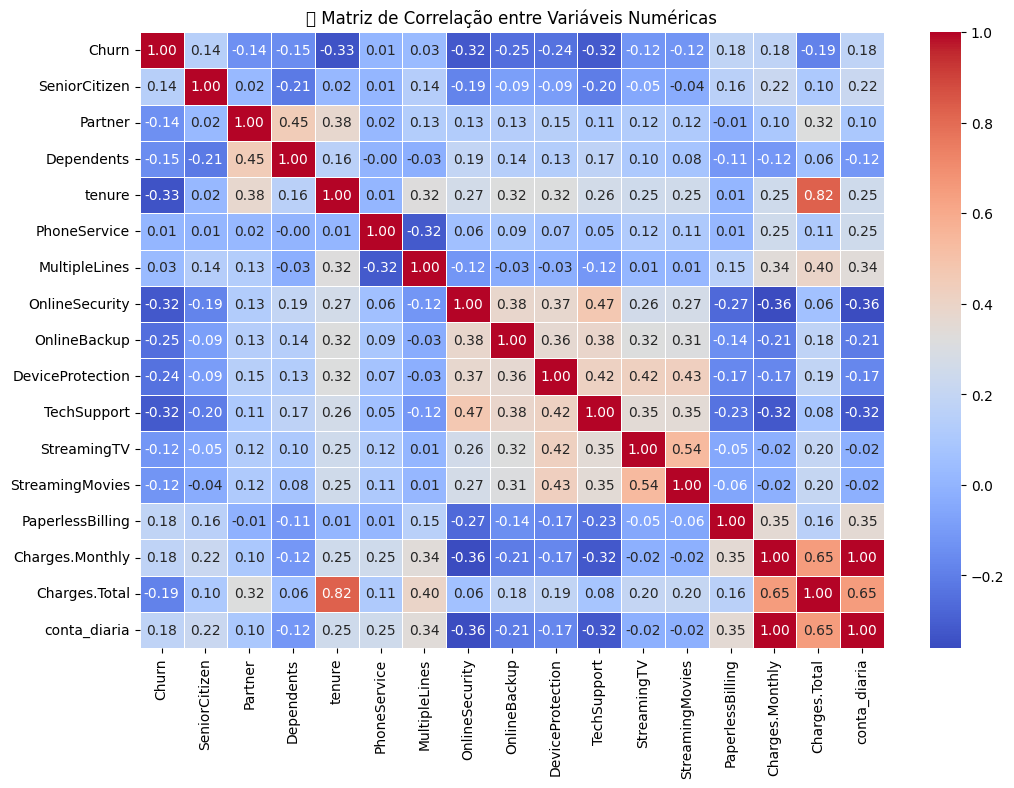

In [32]:
#correlação para identificar relações entre variáveis numéricas. Observe especialmente quais variáveis apresentam maior correlação com a evasão, pois elas podem ser fortes candidatas para o modelo preditivo.
corr_matrix = dataframe.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("🔍 Matriz de Correlação entre Variáveis Numéricas")
plt.show()
